In [1]:
import torch
import torchvision
import torchvision.datasets as dset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [2]:
transform = transforms.Compose(
                   [transforms.Resize((28,28)),
                    transforms.ToTensor(),
                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


In [3]:
trainset = dset.ImageFolder(root="/Users/ilayda/Music/train_set/",transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,shuffle=True,  num_workers=2)

testset = dset.ImageFolder(root='/Users/ilayda/Music/test_set/',transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,shuffle=True,     num_workers=2)

In [4]:
classes=('low','medium','high')


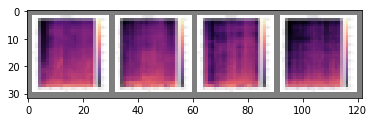

IndexError: tuple index out of range

In [5]:

get_ipython().magic('matplotlib inline')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
plt.show()
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [258]:


# Define network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    # Added dropout
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = F.relu(self.fc2(x))
        x = F.dropout(x, training=self.training)
        x = self.fc3(x)
        return x


# Instantiate the network
net = Net()
  # Enable GPU operations

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)




# Training
for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 100 == 99:    # print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0


    # Print test results after each epoch
    correct = 0
    total = 0
    for data in testloader:
        images, labels = data
        outputs = net(Variable(images)).cpu()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

    print('test_acc: %d %%' % (100 * correct / total))

print('Finished Training')


# Testing
dataiter = iter(testloader)
images, labels = dataiter.next()
net.eval()    # Test mode (dropout)

# print images
imshow(torchvision.utils.make_grid(images))
plt.show()
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))


correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images.cuda())).cpu()
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images.cuda())).cpu()
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))


test_acc: 33 %
test_acc: 26 %
test_acc: 20 %
test_acc: 26 %
test_acc: 40 %
test_acc: 33 %
test_acc: 40 %
test_acc: 33 %
test_acc: 60 %
test_acc: 33 %
test_acc: 33 %
test_acc: 40 %
test_acc: 26 %
test_acc: 40 %
test_acc: 26 %
test_acc: 33 %
test_acc: 26 %
test_acc: 20 %
test_acc: 20 %
test_acc: 20 %
test_acc: 40 %
test_acc: 26 %
test_acc: 53 %
test_acc: 40 %
test_acc: 33 %


Process Process-553:
Traceback (most recent call last):
  File "/Users/ilayda/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/Users/ilayda/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/ilayda/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 40, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/Users/ilayda/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 40, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/Users/ilayda/anaconda3/lib/python3.6/site-packages/torchvision-0.1.9-py3.6.egg/torchvision/datasets/folder.py", line 116, in __getitem__
    img = self.loader(path)
  File "/Users/ilayda/anaconda3/lib/python3.6/site-packages/torchvision-0.1.9-py3.6.egg/torchvision/datasets/folder.py", line 63, in default_loader
    return pi

KeyboardInterrupt: 

  File "/Users/ilayda/anaconda3/lib/python3.6/site-packages/torchvision-0.1.9-py3.6.egg/torchvision/datasets/folder.py", line 46, in pil_loader
    return img.convert('RGB')
  File "/Users/ilayda/anaconda3/lib/python3.6/site-packages/PIL/Image.py", line 860, in convert
    self.load()
  File "/Users/ilayda/anaconda3/lib/python3.6/site-packages/PIL/ImageFile.py", line 234, in load
    n, err_code = decoder.decode(b)
KeyboardInterrupt
Process Process-554:
Traceback (most recent call last):
  File "/Users/ilayda/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/Users/ilayda/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/ilayda/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 40, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/Users/ilayda/anaconda3/lib/python3.6/site-packages/torch/utils/data